In [1]:
import numpy as np
import pandas as pd
import math as mt
import scipy
import sklearn
import os

import scipy.stats as stats

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

from sklearn.impute import SimpleImputer
#from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.impute import MissingIndicator


%matplotlib inline
sns.set_theme(style="darkgrid")

In [2]:
os.listdir()A

['healthcare_project.ipynb',
 'healthcare_project_f1.ipynb',
 'health_care_diabetes.xlsx']

In [3]:
healthcare = pd.read_excel("health_care_diabetes.xlsx")
healthcare.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#Pregnancies: Number of times pregnant
#Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#BloodPressure: Diastolic blood pressure (mm Hg)
#SkinThickness: Triceps skin fold thickness (mm)
#Insulin: 2-Hour serum insulin (mu U/ml)
#BMI: Body mass index (weight in kg/(height in m)^2)
#DiabetesPedigreeFunction: Diabetes pedigree function
#Age: Age (years)

#Target variable is outcome column.

In [6]:
healthcare.shape

(768, 9)

In [7]:
pd.set_option('display.max_rows',768)
healthcare

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
list(healthcare)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [8]:
"""Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, 
   a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the 
   data types and the count of variables. """

'Data Exploration:\n\n1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, \n   a value of zero does not make sense and thus indicates missing value:\n\n• Glucose\n\n• BloodPressure\n\n• SkinThickness\n\n• Insulin\n\n• BMI\n\n2. Visually explore these variables using histograms. Treat the missing values accordingly.\n\n3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the \n   data types and the count of variables. '

## Problem. 1

# Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

# • Glucose

# • BloodPressure

# • SkinThickness

# • Insulin

# • BMI

In [9]:
healthcare.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
healthcare.describe(include=['int64'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,81.000000,1.000000


In [11]:
healthcare.describe(include=['float64'])

,BMI,DiabetesPedigreeFunction
count,768.000000,768.000000
mean,31.992578,0.471876
std,7.884160,0.331329
min,0.000000,0.078000
25%,27.300000,0.243750
50%,32.000000,0.372500
75%,36.600000,0.626250
max,67.100000,2.420000


# Understand the variables and their corresponding values

#pregnancie is discrete variable and can also be act as a categoriacl variables
#outcome is categorical variable.
#Glucose, BloodPressure, SkinThickness, Insuline are discrete variableand can also be act as contineous variables
#BMI, DiabetesPedigreeFunction are contineous variables

In [12]:
healthcare.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
healthcare.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# for Contineous variables( float64)

# BMI  
On the columns below, a value of zero does not make sense and thus indicates missing value:¶

In [14]:
np.sort(healthcare.BMI.unique())

array([ 0. , 18.2, 18.4, 19.1, 19.3, 19.4, 19.5, 19.6, 19.9, 20. , 20.1,
       20.4, 20.8, 21. , 21.1, 21.2, 21.7, 21.8, 21.9, 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.9, 23. , 23.1, 23.2, 23.3, 23.4, 23.5,
       23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5, 24.6,
       24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.8,
       25.9, 26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9,
       27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28. ,
       28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29. , 29.2,
       29.3, 29.5, 29.6, 29.7, 29.8, 29.9, 30. , 30.1, 30.2, 30.3, 30.4,
       30.5, 30.7, 30.8, 30.9, 31. , 31.1, 31.2, 31.3, 31.6, 31.9, 32. ,
       32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.1, 33.2,
       33.3, 33.5, 33.6, 33.7, 33.8, 33.9, 34. , 34.1, 34.2, 34.3, 34.4,
       34.5, 34.6, 34.7, 34.8, 34.9, 35. , 35.1, 35.2, 35.3, 35.4, 35.5,
       35.6, 35.7, 35.8, 35.9, 36. , 36.1, 36.2, 36

#BMI min = 0 this shows that that its a missing value while
#BMI max = 67, this may happen if someone with 166 cm height and 185 kg weight.

In [15]:
bmi = healthcare.BMI.value_counts().to_frame().sort_index()

bmi.rename(columns = {'BMI': 'bmi_count'}, inplace =True)
bmi.index.name = 'bmi'

bmi

,bmi_count
bmi,
0.0,11
18.2,3
18.4,1
19.1,1
19.3,1
19.4,1
19.5,2
19.6,3
19.9,1


In [16]:
healthcare['BMI'].value_counts(normalize = True)

32.0    0.016927
31.2    0.015625
31.6    0.015625
0.0     0.014323
33.3    0.013021
32.4    0.013021
32.9    0.011719
32.8    0.011719
30.8    0.011719
30.1    0.011719
33.6    0.010417
34.2    0.010417
29.7    0.010417
25.9    0.009115
30.0    0.009115
39.4    0.009115
27.8    0.009115
27.6    0.009115
33.2    0.009115
30.4    0.009115
35.5    0.009115
28.7    0.009115
30.5    0.009115
28.9    0.007812
32.5    0.007812
25.6    0.007812
34.3    0.007812
34.9    0.007812
25.0    0.007812
34.0    0.007812
36.8    0.007812
38.5    0.007812
28.4    0.007812
24.2    0.007812
25.2    0.007812
33.8    0.006510
35.9    0.006510
24.7    0.006510
37.6    0.006510
37.7    0.006510
34.6    0.006510
21.8    0.006510
27.5    0.006510
27.4    0.006510
29.3    0.006510
33.7    0.006510
34.5    0.006510
28.0    0.006510
30.9    0.006510
36.6    0.006510
29.5    0.006510
35.8    0.006510
29.0    0.006510
29.9    0.006510
43.3    0.006510
21.1    0.005208
26.8    0.005208
24.3    0.005208
25.4    0.0052

In [17]:
bmi[bmi.index == 0.0]
# there are 11 missing values i.e, 1.4323 %
# hence, we can remove the missing values or impute 

,bmi_count
bmi,
0.0,11


# DiabetesPedigreeFunction

In [18]:
np.sort(healthcare.DiabetesPedigreeFunction.unique())

array([0.078, 0.084, 0.085, 0.088, 0.089, 0.092, 0.096, 0.1  , 0.101,
       0.102, 0.107, 0.108, 0.115, 0.118, 0.121, 0.122, 0.123, 0.126,
       0.127, 0.128, 0.129, 0.13 , 0.133, 0.134, 0.135, 0.136, 0.137,
       0.138, 0.14 , 0.141, 0.142, 0.143, 0.144, 0.145, 0.147, 0.148,
       0.149, 0.15 , 0.151, 0.153, 0.154, 0.155, 0.156, 0.157, 0.158,
       0.159, 0.16 , 0.161, 0.162, 0.163, 0.164, 0.165, 0.166, 0.167,
       0.17 , 0.171, 0.173, 0.174, 0.175, 0.176, 0.177, 0.178, 0.179,
       0.18 , 0.181, 0.182, 0.183, 0.186, 0.187, 0.188, 0.189, 0.19 ,
       0.191, 0.192, 0.194, 0.196, 0.197, 0.198, 0.199, 0.2  , 0.201,
       0.203, 0.204, 0.205, 0.206, 0.207, 0.209, 0.21 , 0.212, 0.215,
       0.217, 0.218, 0.219, 0.22 , 0.221, 0.222, 0.223, 0.225, 0.226,
       0.227, 0.229, 0.23 , 0.231, 0.232, 0.233, 0.234, 0.235, 0.236,
       0.237, 0.238, 0.239, 0.24 , 0.241, 0.243, 0.244, 0.245, 0.246,
       0.247, 0.248, 0.249, 0.251, 0.252, 0.253, 0.254, 0.255, 0.256,
       0.257, 0.258,

DiabetesPedigreeFunction has no missing values and and seems good data by its range and distribution of the data

# for Discreate Variables(int64)

# Pregnancies

In [19]:
np.sort(healthcare.Pregnancies.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17])

Here 0 means she has not been pregnant and has no missing value

and data seems within the valid range

# Glucose

In [20]:
np.sort(healthcare.Glucose.unique())

array([  0,  44,  56,  57,  61,  62,  65,  67,  68,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193,
       194, 195, 196, 197, 198, 199])

Glucose data are numeric discreate values
with missing value = 0 and its range seems within the range

its upper range is 199 seems describable value

In [21]:
healthcare.Glucose.value_counts(normalize = True).to_frame().sort_index()

,Glucose
0,0.006510
44,0.001302
56,0.001302
57,0.002604
61,0.001302
62,0.001302
65,0.001302
67,0.001302
68,0.003906
71,0.005208


#.651% missing value

# BloodPressure

In [22]:
np.sort(healthcare.BloodPressure.unique())

array([  0,  24,  30,  38,  40,  44,  46,  48,  50,  52,  54,  55,  56,
        58,  60,  61,  62,  64,  65,  66,  68,  70,  72,  74,  75,  76,
        78,  80,  82,  84,  85,  86,  88,  90,  92,  94,  95,  96,  98,
       100, 102, 104, 106, 108, 110, 114, 122])

#here 0 means missing value and its range is 24 to 122 that seems good but here below 55 is very critical BP of petients

In [23]:
healthcare.BloodPressure.value_counts().to_frame().sort_index()

,BloodPressure
0,35
24,1
30,2
38,1
40,1
44,4
46,2
48,5
50,13
52,11


In [24]:
healthcare.BloodPressure.value_counts(normalize = True).to_frame().sort_index()

,BloodPressure
0,0.045573
24,0.001302
30,0.002604
38,0.001302
40,0.001302
44,0.005208
46,0.002604
48,0.006510
50,0.016927
52,0.014323


missing values = 35 (4.557%)

{
Normal
Systolic <120mmHg,
Diastolic <80mmHg
Prehypertension
Systolic >=120mmHg — <=139mmHg
Diastolic >=80 — <=89mmHg
High
Systolic: >=140mmHg
Diastolic: >=90mmHg
}

# SkinThickness

In [25]:
np.sort(healthcare.SkinThickness.unique())

array([ 0,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 60, 63, 99])

here 0 is missing value while its range is 7mm to 99mm.

In [26]:
healthcare.SkinThickness.value_counts(normalize = True).to_frame().sort_index()

,SkinThickness
0,0.295573
7,0.002604
8,0.002604
10,0.006510
11,0.007812
12,0.009115
13,0.014323
14,0.007812
15,0.018229
16,0.007812


missing value = 227 (29.557%)

# Insulin 

In [27]:
np.sort(healthcare.Insulin.unique())

array([  0,  14,  15,  16,  18,  22,  23,  25,  29,  32,  36,  37,  38,
        40,  41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,
        68,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,
        99, 100, 105, 106, 108, 110, 112, 114, 115, 116, 119, 120, 122,
       125, 126, 127, 128, 129, 130, 132, 135, 140, 142, 144, 145, 146,
       148, 150, 152, 155, 156, 158, 159, 160, 165, 166, 167, 168, 170,
       171, 175, 176, 178, 180, 182, 183, 184, 185, 188, 190, 191, 192,
       193, 194, 196, 200, 204, 205, 207, 210, 215, 220, 225, 228, 230,
       231, 235, 237, 240, 245, 249, 250, 255, 258, 265, 270, 271, 272,
       274, 275, 277, 278, 280, 284, 285, 291, 293, 300, 304, 310, 318,
       321, 325, 326, 328, 330, 335, 342, 360, 370, 375, 387, 392, 402,
       415, 440, 465, 474, 478, 480, 485, 495, 510, 540, 543, 54

In [28]:
healthcare.groupby('Insulin')['Outcome'].value_counts()

Insulin  Outcome
0        0          236
         1          138
14       1            1
15       0            1
16       0            1
18       0            2
22       0            1
23       0            2
25       0            1
29       1            1
32       0            1
36       0            2
         1            1
37       0            2
38       0            1
40       0            2
41       0            1
42       0            1
43       0            1
44       0            3
45       0            3
46       0            1
48       0            2
         1            1
49       0            5
50       0            3
51       0            1
52       0            1
53       0            2
54       0            4
55       0            2
56       0            5
57       0            2
58       0            1
         1            1
59       0            1
60       0            2
61       0            1
63       0            3
64       0            3
         1            1

here 236 non-diabetic people has no insulin in his body i.e, seems to be missing value while
138 diabetic people has no insulin in his body
those are of type-1 diabetic, no production of insulin but to live they have to take insule from external source so it should not be zero.
those are of type-2 diabetic, should have insulin in his body.
hence net missing value = 236 + 138 = 374

In [29]:
healthcare.Insulin.value_counts(normalize = True)

0      0.486979
105    0.014323
140    0.011719
130    0.011719
120    0.010417
100    0.009115
180    0.009115
94     0.009115
115    0.007812
135    0.007812
110    0.007812
76     0.006510
56     0.006510
49     0.006510
210    0.006510
66     0.006510
155    0.005208
64     0.005208
88     0.005208
168    0.005208
90     0.005208
71     0.005208
165    0.005208
160    0.005208
190    0.005208
54     0.005208
200    0.005208
125    0.005208
145    0.003906
194    0.003906
82     0.003906
325    0.003906
156    0.003906
106    0.003906
75     0.003906
74     0.003906
36     0.003906
126    0.003906
70     0.003906
215    0.003906
92     0.003906
44     0.003906
45     0.003906
63     0.003906
175    0.003906
176    0.003906
48     0.003906
182    0.003906
50     0.003906
83     0.003906
132    0.002604
122    0.002604
144    0.002604
170    0.002604
148    0.002604
230    0.002604
495    0.002604
480    0.002604
293    0.002604
285    0.002604
265    0.002604
240    0.002604
231    0

# 48.698 % missing value

# Age

In [30]:
np.sort(healthcare.Age.unique())

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72,
       81])

no missing value

# Outcome

In [31]:
np.sort(healthcare.Outcome.unique())

array([0, 1])

no missing value

# Visually explore these variables using histograms.
# Treat the missing values accordingly.

In [32]:
for col in healthcare.columns:
    print(col, len(healthcare[col].unique()), healthcare[col].unique())

Pregnancies 17 [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose 136 [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure 47 [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness 51 [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 4

In [33]:
healthcare

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


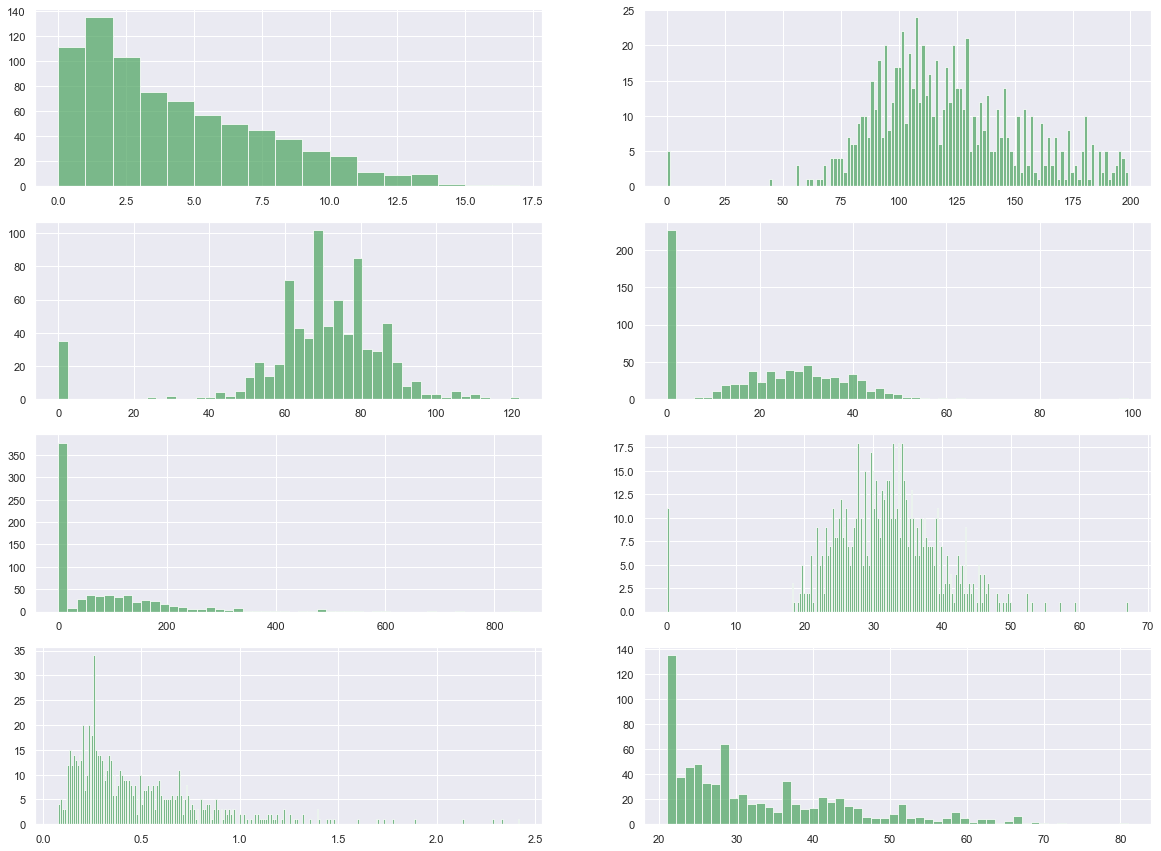

In [34]:
f, ax = plt.subplots(4,2,figsize = (20,15))
ax[0,0].hist(healthcare['Pregnancies'], 17, facecolor='g', alpha=0.75)
ax[0,1].hist(healthcare['Glucose'], 136, facecolor='g', alpha=0.75)
ax[1,0].hist(healthcare['BloodPressure'], 47, facecolor='g', alpha=0.75)
ax[1,1].hist(healthcare['SkinThickness'], 51, facecolor='g', alpha=0.75)
ax[2,0].hist(healthcare['Insulin'], 50, facecolor='g', alpha=0.75)
ax[2,1].hist(healthcare['BMI'], 248, facecolor='g', alpha=0.75)
ax[3,0].hist(healthcare['DiabetesPedigreeFunction'], 250, facecolor='g', alpha=0.75)
ax[3,1].hist(healthcare['Age'], 52, facecolor='g', alpha=0.75)
plt.grid(True)
plt.show()

In [35]:
healthcare.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

<AxesSubplot:>

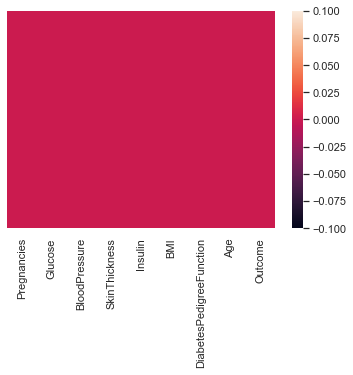

In [36]:
sns.heatmap(healthcare.isnull(), yticklabels=False)

In [37]:
healthcare[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = healthcare[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].astype('float')
healthcare[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = healthcare[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0.0, np.nan)
healthcare.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

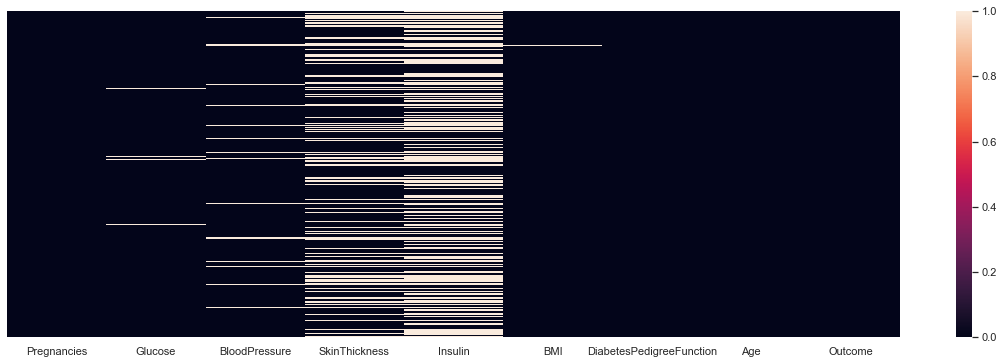

In [38]:
plt.figure(figsize=(20,6))
sns.heatmap(healthcare.isnull(), yticklabels=False)
plt.show()

In [39]:
from sklearn.impute import MissingIndicator

missing_indicator = MissingIndicator(missing_values = np.nan, features = 'all')
missing_indicator

MissingIndicator(features='all')

In [40]:
healthcare_missindicator = missing_indicator.fit_transform(healthcare)
healthcare_missindicator

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [41]:
duplicates = healthcare.drop_duplicates()
duplicates.shape, healthcare.shape # no duplicates values

((768, 9), (768, 9))

In [42]:
dropna_df = healthcare.dropna(how = 'any', axis = 0)
dropna_df.shape, list(dropna_df.index)

((392, 9),
 [3,
  4,
  6,
  8,
  13,
  14,
  16,
  18,
  19,
  20,
  24,
  25,
  27,
  28,
  31,
  32,
  35,
  39,
  40,
  43,
  50,
  51,
  52,
  53,
  54,
  56,
  57,
  59,
  63,
  68,
  69,
  70,
  71,
  73,
  82,
  85,
  87,
  88,
  91,
  92,
  94,
  95,
  97,
  98,
  99,
  103,
  105,
  107,
  108,
  109,
  110,
  111,
  112,
  114,
  119,
  120,
  122,
  125,
  126,
  127,
  128,
  130,
  132,
  134,
  135,
  136,
  137,
  139,
  142,
  144,
  147,
  150,
  152,
  153,
  156,
  157,
  158,
  159,
  161,
  162,
  165,
  169,
  171,
  173,
  174,
  175,
  177,
  181,
  186,
  187,
  188,
  189,
  191,
  195,
  197,
  198,
  199,
  203,
  204,
  206,
  208,
  213,
  214,
  215,
  216,
  217,
  220,
  223,
  224,
  225,
  228,
  229,
  231,
  232,
  234,
  236,
  241,
  243,
  244,
  247,
  248,
  252,
  254,
  258,
  259,
  260,
  265,
  271,
  273,
  275,
  277,
  279,
  281,
  282,
  285,
  286,
  287,
  288,
  289,
  290,
  291,
  292,
  293,
  295,
  296,
  297,
  298,
  301,
  

In [43]:
missing_df = duplicates.drop(dropna_df.index) # data with missing values\
missing_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
10,4,110.0,92.0,NaN,NaN,37.6,0.191,30,0
11,10,168.0,74.0,NaN,NaN,38.0,0.537,34,1
12,10,139.0,80.0,NaN,NaN,27.1,1.441,57,0
15,7,100.0,NaN,NaN,NaN,30.0,0.484,32,1


In [44]:
missing_df.isnull().sum(), missing_df.shape

(Pregnancies                   0
 Glucose                       5
 BloodPressure                35
 SkinThickness               227
 Insulin                     374
 BMI                          11
 DiabetesPedigreeFunction      0
 Age                           0
 Outcome                       0
 dtype: int64,
 (376, 9))

<AxesSubplot:>

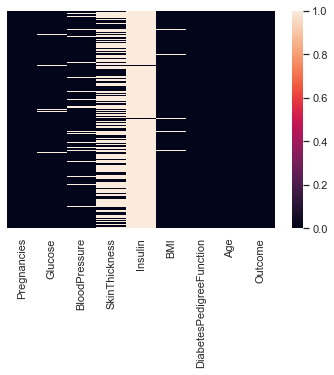

In [45]:
sns.heatmap(missing_df.isnull(), yticklabels=False)

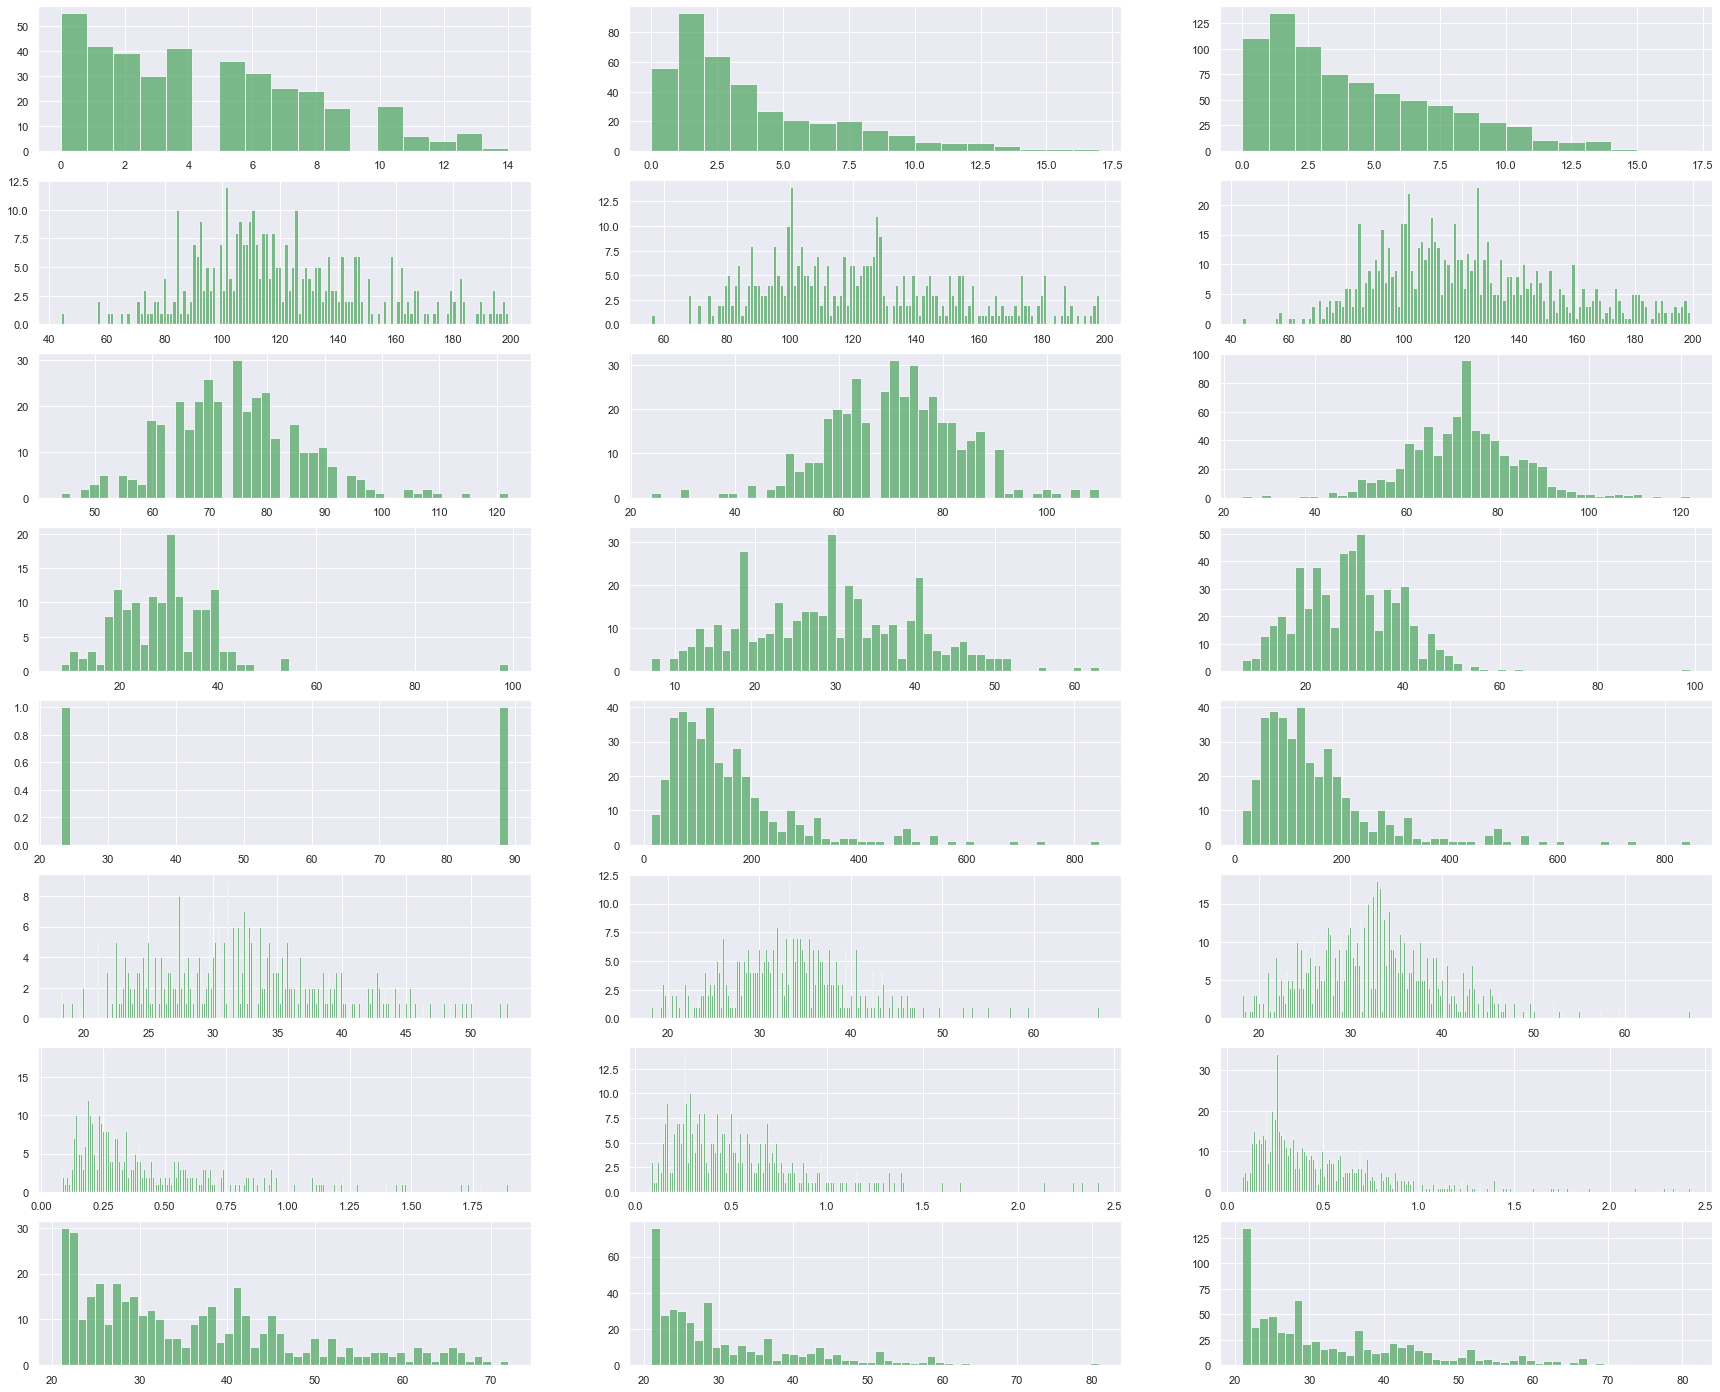

In [46]:
f, ax = plt.subplots(8,3,figsize = (30,25))
ax[0,0].hist(missing_df['Pregnancies'], 17, facecolor='g', alpha=0.75)
ax[0,1].hist(dropna_df['Pregnancies'], 17, facecolor='g', alpha=0.75)
ax[0,2].hist(healthcare['Pregnancies'], 17, facecolor='g', alpha=0.75)
ax[1,0].hist(missing_df['Glucose'], 136, facecolor='g', alpha=0.75)
ax[1,1].hist(dropna_df['Glucose'], 136, facecolor='g', alpha=0.75)
ax[1,2].hist(healthcare['Glucose'], 136, facecolor='g', alpha=0.75)
ax[2,0].hist(missing_df['BloodPressure'], 47, facecolor='g', alpha=0.75)
ax[2,1].hist(dropna_df['BloodPressure'], 47, facecolor='g', alpha=0.75)
ax[2,2].hist(healthcare['BloodPressure'], 47, facecolor='g', alpha=0.75)
ax[3,0].hist(missing_df['SkinThickness'], 51, facecolor='g', alpha=0.75)
ax[3,1].hist(dropna_df['SkinThickness'], 51, facecolor='g', alpha=0.75)
ax[3,2].hist(healthcare['SkinThickness'], 51, facecolor='g', alpha=0.75)
ax[4,0].hist(missing_df['Insulin'], 50, facecolor='g', alpha=0.75)
ax[4,1].hist(dropna_df['Insulin'], 50, facecolor='g', alpha=0.75)
ax[4,2].hist(healthcare['Insulin'], 50, facecolor='g', alpha=0.75)
ax[5,0].hist(missing_df['BMI'], 248, facecolor='g', alpha=0.75)
ax[5,1].hist(dropna_df['BMI'], 248, facecolor='g', alpha=0.75)
ax[5,2].hist(healthcare['BMI'], 248, facecolor='g', alpha=0.75)
ax[6,0].hist(missing_df['DiabetesPedigreeFunction'], 250, facecolor='g', alpha=0.75)
ax[6,1].hist(dropna_df['DiabetesPedigreeFunction'], 250, facecolor='g', alpha=0.75)
ax[6,2].hist(healthcare['DiabetesPedigreeFunction'], 250, facecolor='g', alpha=0.75)
ax[7,0].hist(missing_df['Age'], 52, facecolor='g', alpha=0.75)
ax[7,1].hist(dropna_df['Age'], 52, facecolor='g', alpha=0.75)
ax[7,2].hist(healthcare['Age'], 52, facecolor='g', alpha=0.75)
plt.grid(True)
plt.show()

# COL 1 = LOST DATA( by row)
#COL 2 = REMAINING DATA(by row)
#COL 3 = ORIGINAL DATA ( droped only np.nan cell)

In [47]:
healthcare.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [48]:
missing_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,376.000000,371.000000,341.000000,149.000000,2.000000,365.000000,376.000000,376.000000,376.000000
mean,4.412234,120.692722,74.407625,29.174497,56.000000,31.782192,0.418529,35.718085,0.367021
std,3.440583,30.198039,11.957811,10.407723,46.669048,6.757620,0.307390,12.740708,0.482635
min,0.000000,44.000000,44.000000,8.000000,23.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.500000,66.000000,22.000000,39.500000,26.800000,0.209000,25.000000,0.000000
50%,4.000000,115.000000,74.000000,30.000000,56.000000,31.200000,0.302500,32.000000,0.000000
75%,7.000000,138.000000,82.000000,35.000000,72.500000,35.700000,0.554750,43.000000,1.000000
max,14.000000,199.000000,122.000000,99.000000,89.000000,52.900000,1.893000,72.000000,1.000000


In [49]:
dropna_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [50]:
## 

In [51]:
df_2 = healthcare[['SkinThickness', 'Insulin']].dropna(how = 'any')
df_2 = healthcare.drop(df_2.index)
df_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
10,4,110.0,92.0,NaN,NaN,37.6,0.191,30,0
11,10,168.0,74.0,NaN,NaN,38.0,0.537,34,1
12,10,139.0,80.0,NaN,NaN,27.1,1.441,57,0
15,7,100.0,NaN,NaN,NaN,30.0,0.484,32,1


In [52]:
missing_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
10,4,110.0,92.0,NaN,NaN,37.6,0.191,30,0
11,10,168.0,74.0,NaN,NaN,38.0,0.537,34,1
12,10,139.0,80.0,NaN,NaN,27.1,1.441,57,0
15,7,100.0,NaN,NaN,NaN,30.0,0.484,32,1


In [53]:
#healthcare.drop()

In [54]:
healthcare = pd.read_csv("/Users/niru/Desktop/Project 2/Healthcare - Diabetes/health_care_diabetes.csv")

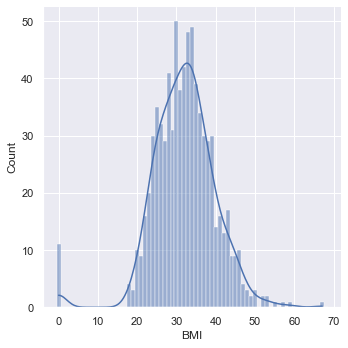

In [55]:
sns.displot(healthcare, x="BMI", discrete=True, kde=True)

In [56]:
stats.skew(healthcare['BMI']) # scipy

-0.42814327880861786

In [57]:
healthcare.BMI.mean()

31.992578124999977

In [58]:
healthcare.BMI.median()

32.0

In [59]:
healthcare.BMI.mode()

0    32.0
dtype: float64

In [60]:
healthcare.BMI.var()

62.15998395738257

In [61]:
healthcare.BMI.std()

7.8841603203754405

In [62]:
# range
healthcare.BMI.max() - healthcare.BMI.min()

67.1

In [63]:
healthcare.BMI.skew()

-0.42898158845356543

In [64]:
healthcare.BMI.kurt()

3.290442900816981

<AxesSubplot:>

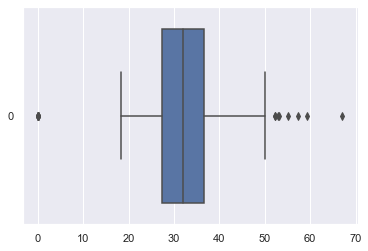

In [65]:
sns.boxplot(data=healthcare['BMI'],orient="h")

<AxesSubplot:>

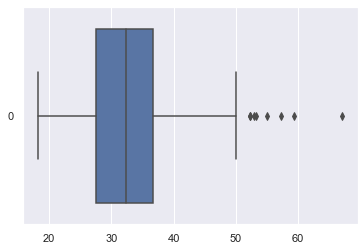

In [66]:
sns.boxplot(data=healthcare[healthcare['BMI'] != 0]['BMI'],orient="h")

<AxesSubplot:>

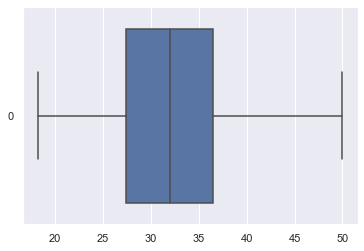

In [67]:
sns.boxplot(data=healthcare[((healthcare['BMI'] != 0) & (healthcare['BMI'] <= 50))]['BMI'],orient="h")

In [68]:
age_grouped = healthcare.groupby(by = "Age")
age_grouped

In [69]:
age_grouped.get_group(21)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
55,1,73,50,10,0,23.0,0.248,21,0
60,2,84,0,0,0,0.0,0.304,21,0
90,1,80,55,0,0,19.1,0.258,21,0
94,2,142,82,18,64,24.7,0.761,21,0
102,0,125,96,0,0,22.5,0.262,21,0
105,1,126,56,29,152,28.7,0.801,21,0
119,4,99,76,15,51,23.2,0.223,21,0
136,0,100,70,26,50,30.8,0.597,21,0
145,0,102,75,23,0,0.0,0.572,21,0


In [70]:
age_grouped['BMI'].value_counts()

Age  BMI 
21   0.0     3
     24.7    3
     30.8    3
     18.2    2
     21.8    2
     22.6    2
     25.2    2
     25.4    2
     27.4    2
     33.2    2
     34.6    2
     35.8    2
     19.1    1
     21.0    1
     22.1    1
     22.5    1
     23.0    1
     23.2    1
     23.7    1
     24.3    1
     24.6    1
     24.8    1
     25.1    1
     26.0    1
     26.2    1
     26.4    1
     27.7    1
     27.8    1
     28.1    1
     28.6    1
     28.7    1
     29.2    1
     29.7    1
     30.4    1
     31.0    1
     32.4    1
     33.6    1
     35.7    1
     36.6    1
     36.9    1
     38.1    1
     38.6    1
     40.6    1
     40.7    1
     42.1    1
     42.7    1
     42.9    1
     43.5    1
22   32.0    3
     0.0     2
     26.1    2
     27.3    2
     27.5    2
     28.4    2
     28.7    2
     29.0    2
     32.5    2
     19.4    1
     20.0    1
     20.4    1
     21.8    1
     22.4    1
     22.5    1
     22.9    1
     23.1    1
     23.2    1


In [71]:
age_grouped['BMI'].value_counts().to_frame()

BMI
Age BMI      
21  0.0     3
    24.7    3
    30.8    3
    18.2    2
    21.8    2
    22.6    2
    25.2    2
    25.4    2
    27.4    2
    33.2    2
    34.6    2
    35.8    2
    19.1    1
    21.0    1
    22.1    1
    22.5    1
    23.0    1
    23.2    1
    23.7    1
    24.3    1
    24.6    1
    24.8    1
    25.1    1
    26.0    1
    26.2    1
    26.4    1
    27.7    1
    27.8    1
    28.1    1
    28.6    1
    28.7    1
    29.2    1
    29.7    1
    30.4    1
    31.0    1
    32.4    1
    33.6    1
    35.7    1
    36.6    1
    36.9    1
    38.1    1
    38.6    1
    40.6    1
    40.7    1
    42.1    1
    42.7    1
    42.9    1
    43.5    1
22  32.0    3
    0.0     2
    26.1    2
    27.3    2
    27.5    2
    28.4    2
    28.7    2
    29.0    2
    32.5    2
    19.4    1
    20.0    1
    20.4    1
    21.8    1
    22.4    1
    22.5    1
    22.9    1
    23.1    1
    23.2    1
    23.9    1
    24.2    1
    24.6    1
    24.7    1
    24.8    1
    25.0    1
    25.2    1
    25.3    1
    25.4    1
    25.6    1
    25.9    1
    27.2    1
    27.8    1
    28.0    1
    28.2    1
    28.5    1
    29.5    1
    29.8    1
    30.0    1
    30.1    1
    30.8    1
    31.2    1
    32.2    1
    32.4    1
    33.1    1
    33.2    1
    33.6    1
    34.2    1
    34.3    1
    34.4    1
    34.6    1
    34.7    1
    35.7    1
    37.2    1
    37.8    1
    38.8    1
    39.4    1
    40.0    1
    41.5    1
    42.4    1
    42.9    1
    44.0    1
    44.6    1
    57.3    1
23  25.2    2
    30.1    2
    33.3    2
    20.1    1
    21.2    1
    22.2    1
    22.9    1
    23.5    1
    24.0    1
    24.1    1
    24.2    1
    26.2    1
    26.4    1
    27.8    1
    28.7    1
    28.9    1
    29.7    1
    29.9    1
    30.4    1
    31.2    1
    31.6    1
    32.8    1
    32.9    1
    33.6    1
    34.9    1
    35.1    1
    36.3    1
    38.0    1
    38.2    1
    39.1    1
    40.6    1
    43.5    1
    44.1    1
    45.5    1
    52.3    1
24  25.6    2
    31.6    2
    33.3    2
    37.4    2
    0.0     1
    22.3    1
    24.4    1
    25.0    1
    25.4    1
    25.9    1
    26.3    1
    26.5    1
    26.6    1
    27.1    1
    27.2    1
    28.9    1
    30.2    1
    30.7    1
    30.8    1
    30.9    1
    31.2    1
    32.1    1
    32.4    1
    33.2    1
    34.2    1
    34.3    1
    34.5    1
    34.8    1
    35.5    1
    36.8    1
    37.2    1
    37.6    1
    37.8    1
    39.4    1
    40.0    1
    40.5    1
    42.3    1
    42.6    1
    42.8    1
    44.5    1
    45.2    1
    45.3    1
25  31.6    3
    21.1    2
    27.7    2
    34.9    2
    35.8    2
    0.0     1
    19.5    1
    19.6    1
    21.9    1
    23.5    1
    24.3    1
    25.0    1
    25.1    1
    26.0    1
    28.5    1
    28.7    1
    28.9    1
    29.5    1
    30.1    1
    30.5    1
    31.9    1
    32.7    1
    33.2    1
    33.7    1
    34.0    1
    34.3    1
    34.4    1
    35.3    1
    35.5    1
    36.0    1
    36.1    1
    36.3    1
    36.6    1
    36.8    1
    38.4    1
    38.7    1
    39.5    1
    39.9    1
    40.5    1
    42.0    1
    53.2    1
    59.4    1
26  21.8    2
    0.0     1
    20.8    1
    21.1    1
    23.1    1
    23.6    1
    24.2    1
    28.6    1
    30.5    1
    30.8    1
    31.0    1
    32.5    1
    33.2    1
    34.0    1
    34.1    1
    34.8    1
    35.7    1
    35.9    1
    36.5    1
    37.5    1
    38.5    1
    40.6    1
    42.1    1
    43.2    1
    43.3    1
    43.6    1
    44.5    1
    45.3    1
    47.9    1
    49.6    1
    55.0    1
    67.1    1
27  32.4    3
    26.8    2
    18.2    1
    18.4    1
    20.4    1
    22.4    1
    23.9    1
    25.0    1
    25.8    1
    26.6    1
    27.6    1
    28.0    1
    28.4    1
    28.9    1
    29.3    1
    30.0    1
    32.3    1
    33.8    1
    34.2    1
    36.8    1
    37.7    1
    38.2    1
    39.3    1
    39

In [72]:
age_grouped['BMI'].value_counts(normalize = True).to_frame()

BMI
Age BMI           
21  0.0   0.047619
    24.7  0.047619
    30.8  0.047619
    18.2  0.031746
    21.8  0.031746
    22.6  0.031746
    25.2  0.031746
    25.4  0.031746
    27.4  0.031746
    33.2  0.031746
    34.6  0.031746
    35.8  0.031746
    19.1  0.015873
    21.0  0.015873
    22.1  0.015873
    22.5  0.015873
    23.0  0.015873
    23.2  0.015873
    23.7  0.015873
    24.3  0.015873
    24.6  0.015873
    24.8  0.015873
    25.1  0.015873
    26.0  0.015873
    26.2  0.015873
    26.4  0.015873
    27.7  0.015873
    27.8  0.015873
    28.1  0.015873
    28.6  0.015873
    28.7  0.015873
    29.2  0.015873
    29.7  0.015873
    30.4  0.015873
    31.0  0.015873
    32.4  0.015873
    33.6  0.015873
    35.7  0.015873
    36.6  0.015873
    36.9  0.015873
    38.1  0.015873
    38.6  0.015873
    40.6  0.015873
    40.7  0.015873
    42.1  0.015873
    42.7  0.015873
    42.9  0.015873
    43.5  0.015873
22  32.0  0.041667
    0.0   0.027778
    26.1  0.027778
    27.3  0.027778
    27.5  0.027778
    28.4  0.027778
    28.7  0.027778
    29.0  0.027778
    32.5  0.027778
    19.4  0.013889
    20.0  0.013889
    20.4  0.013889
    21.8  0.013889
    22.4  0.013889
    22.5  0.013889
    22.9  0.013889
    23.1  0.013889
    23.2  0.013889
    23.9  0.013889
    24.2  0.013889
    24.6  0.013889
    24.7  0.013889
    24.8  0.013889
    25.0  0.013889
    25.2  0.013889
    25.3  0.013889
    25.4  0.013889
    25.6  0.013889
    25.9  0.013889
    27.2  0.013889
    27.8  0.013889
    28.0  0.013889
    28.2  0.013889
    28.5  0.013889
    29.5  0.013889
    29.8  0.013889
    30.0  0.013889
    30.1  0.013889
    30.8  0.013889
    31.2  0.013889
    32.2  0.013889
    32.4  0.013889
    33.1  0.013889
    33.2  0.013889
    33.6  0.013889
    34.2  0.013889
    34.3  0.013889
    34.4  0.013889
    34.6  0.013889
    34.7  0.013889
    35.7  0.013889
    37.2  0.013889
    37.8  0.013889
    38.8  0.013889
    39.4  0.013889
    40.0  0.013889
    41.5  0.013889
    42.4  0.013889
    42.9  0.013889
    44.0  0.013889
    44.6  0.013889
    57.3  0.013889
23  25.2  0.052632
    30.1  0.052632
    33.3  0.052632
    20.1  0.026316
    21.2  0.026316
    22.2  0.026316
    22.9  0.026316
    23.5  0.026316
    24.0  0.026316
    24.1  0.026316
    24.2  0.026316
    26.2  0.026316
    26.4  0.026316
    27.8  0.026316
    28.7  0.026316
    28.9  0.026316
    29.7  0.026316
    29.9  0.026316
    30.4  0.026316
    31.2  0.026316
    31.6  0.026316
    32.8  0.026316
    32.9  0.026316
    33.6  0.026316
    34.9  0.026316
    35.1  0.026316
    36.3  0.026316
    38.0  0.026316
    38.2  0.026316
    39.1  0.026316
    40.6  0.026316
    43.5  0.026316
    44.1  0.026316
    45.5  0.026316
    52.3  0.026316
24  25.6  0.043478
    31.6  0.043478
    33.3  0.043478
    37.4  0.043478
    0.0   0.021739
    22.3  0.021739
    24.4  0.021739
    25.0  0.021739
    25.4  0.021739
    25.9  0.021739
    26.3  0.021739
    26.5  0.021739
    26.6  0.021739
    27.1  0.021739
    27.2  0.021739
    28.9  0.021739
    30.2  0.021739
    30.7  0.021739
    30.8  0.021739
    30.9  0.021739
    31.2  0.021739
    32.1  0.021739
    32.4  0.021739
    33.2  0.021739
    34.2  0.021739
    34.3  0.021739
    34.5  0.021739
    34.8  0.021739
    35.5  0.021739
    36.8  0.021739
    37.2  0.021739
    37.6  0.021739
    37.8  0.021739
    39.4  0.021739
    40.0  0.021739
    40.5  0.021739
    42.3  0.021739
    42.6  0.021739
    42.8  0.021739
    44.5  0.021739
    45.2  0.021739
    45.3  0.021739
25  31.6  0.062500
    21.1  0.041667
    27.7  0.041667
    34.9  0.041667
    35.8  0.041667
    0.0   0.020833
    19.5  0.020833
    19.6  0.020833
    21.9  0.020833
    23.5  0.020833
    24.3  0.020833
    25.0  0.020833
    25.1  0.020833
    26.0  0.020833
    28.5  0.020833
    28.7  0.020833
    28.9  0.020833
    29.5  0.020833
    30.1  0.020833
    30.5  0.020833
    31.9  0.020833
    32.7  0.020833
    33

In [73]:
age_grouped['BMI'].mean().to_frame()

,BMI
Age,
21,27.817460
22,29.509722
23,31.502632
24,32.569565
25,31.943750
26,34.915152
27,31.950000
28,33.642857
29,33.541379


In [74]:
filt = healthcare['BMI'] == 0

In [75]:
healthcare.loc[filt]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


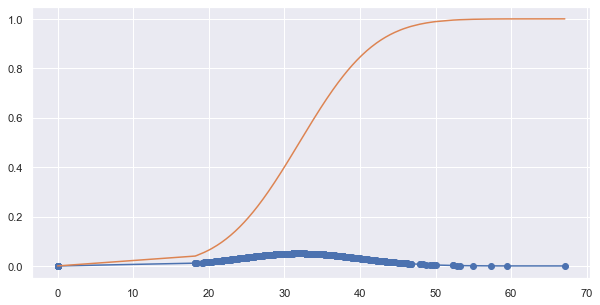

In [76]:
# draw random sample from a normal (gaussian) distribution
mu = healthcare.BMI.mean() # mean
sigma = healthcare.BMI.std() # std
h = healthcare.sort_values(by='BMI').BMI.values
h, abs(mu - np.mean(h)) < 1 # verification

plt.figure(figsize=(10, 5))

fit1 = stats.norm.pdf(h, np.mean(h), np.std(h)) # fitting
fit2 = stats.norm.cdf(h, np.mean(h), np.std(h))

plt.plot(h,fit1, '-o', label = 'pdf')
plt.plot(h,fit2, label = 'cdf')
#plt.hist(abs(mu - np.mean(h)) / len(h))
# plt.hist(h)

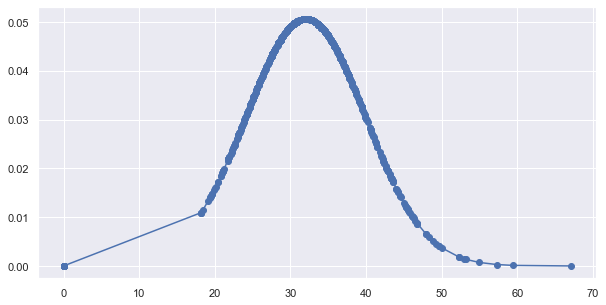

In [77]:
# draw random sample from a normal (gaussian) distribution
mu = healthcare.BMI.mean() # mean
sigma = healthcare.BMI.std() # std
h = healthcare.sort_values(by='BMI').BMI.values
h, abs(mu - np.mean(h)) < 1 # verification

plt.figure(figsize=(10, 5))

fit = stats.norm.pdf(h, np.mean(h), np.std(h)) # fitting

plt.plot(h,fit, '-o')
#plt.hist(abs(mu - np.mean(h)) / len(h))
#plt.hist((mu - np.mean(h)))
# plt.hist(h)

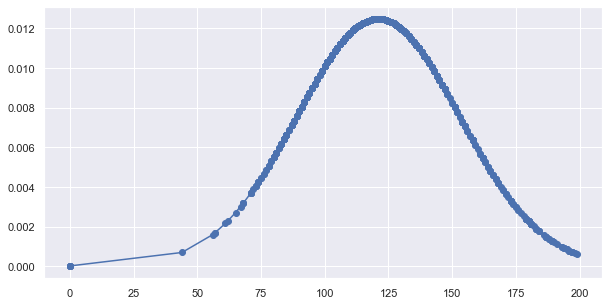

In [78]:
# draw random sample from a normal (gaussian) distribution
mu = healthcare.Glucose.mean() # mean
sigma = healthcare.Glucose.std() # std
h = healthcare.sort_values(by='Glucose').Glucose.values
h, abs(mu - np.mean(h)) < 1 # verification

plt.figure(figsize=(10, 5))

fit = stats.norm.pdf(h, np.mean(h), np.std(h)) # fitting

plt.plot(h,fit, '-o')

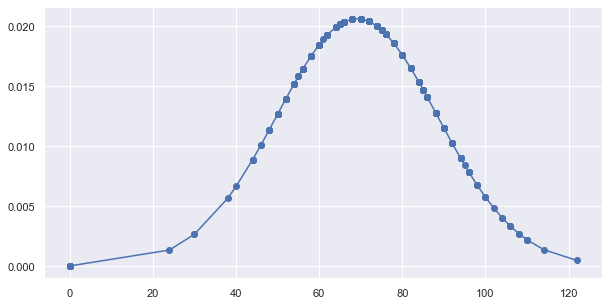

In [79]:
# draw random sample from a normal (gaussian) distribution
mu = healthcare.BloodPressure.mean() # mean
sigma = healthcare.BloodPressure.std() # std
h = healthcare.sort_values(by='BloodPressure').BloodPressure.values
h, abs(mu - np.mean(h)) < 1 # verification

plt.figure(figsize=(10, 5))

fit = stats.norm.pdf(h, np.mean(h), np.std(h)) # fitting

plt.plot(h,fit, '-o')

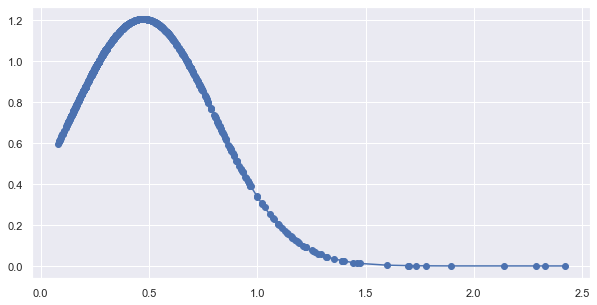

In [80]:
# draw random sample from a normal (gaussian) distribution
mu = healthcare.DiabetesPedigreeFunction.mean() # mean
sigma = healthcare.DiabetesPedigreeFunction.std() # std
h = healthcare.sort_values(by='DiabetesPedigreeFunction').DiabetesPedigreeFunction.values
h, abs(mu - np.mean(h)) < 1 # verification

plt.figure(figsize=(10, 5))

fit = stats.norm.pdf(h, np.mean(h), np.std(h)) # fitting

plt.plot(h,fit, '-o')

In [81]:
h

array([0.078, 0.084, 0.085, 0.085, 0.088, 0.088, 0.089, 0.092, 0.096,
       0.1  , 0.101, 0.102, 0.107, 0.108, 0.115, 0.118, 0.121, 0.121,
       0.122, 0.123, 0.126, 0.126, 0.127, 0.127, 0.128, 0.128, 0.129,
       0.129, 0.13 , 0.133, 0.134, 0.134, 0.135, 0.136, 0.137, 0.137,
       0.138, 0.14 , 0.14 , 0.141, 0.141, 0.141, 0.142, 0.142, 0.142,
       0.143, 0.143, 0.144, 0.145, 0.147, 0.148, 0.148, 0.148, 0.149,
       0.15 , 0.15 , 0.151, 0.151, 0.151, 0.153, 0.153, 0.154, 0.155,
       0.156, 0.157, 0.158, 0.158, 0.159, 0.159, 0.16 , 0.161, 0.161,
       0.162, 0.163, 0.164, 0.164, 0.165, 0.165, 0.165, 0.166, 0.167,
       0.167, 0.167, 0.167, 0.17 , 0.171, 0.173, 0.174, 0.175, 0.176,
       0.177, 0.178, 0.178, 0.178, 0.179, 0.18 , 0.18 , 0.181, 0.182,
       0.183, 0.183, 0.186, 0.187, 0.187, 0.187, 0.188, 0.189, 0.189,
       0.19 , 0.19 , 0.19 , 0.19 , 0.191, 0.191, 0.192, 0.192, 0.194,
       0.196, 0.197, 0.197, 0.197, 0.197, 0.198, 0.198, 0.199, 0.2  ,
       0.2  , 0.2  ,

In [82]:
n = len(healthcare)

con_coef = .95

alpha = 1. - con_coef

In [83]:
x_bar = healthcare["BMI"].mean()
sigma = healthcare["BMI"].std()
sigma, x_bar

(7.8841603203754405, 31.992578124999977)

In [84]:
z_critical = stats.norm.ppf(q = 0.975) # 95% level of confidence
z_critical

1.959963984540054

In [85]:
zinterval = stats.norm.interval(alpha = con_coef)
zinterval

(-1.959963984540054, 1.959963984540054)

In [86]:
standard_error = sigma / mt.sqrt(n)
standard_error

0.2844951302064329

In [87]:
ci_lower = x_bar - z_critical * standard_error
ci_upper = x_bar + z_critical * standard_error
ci_lower, ci_upper

(31.434977916018333, 32.55017833398162)

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

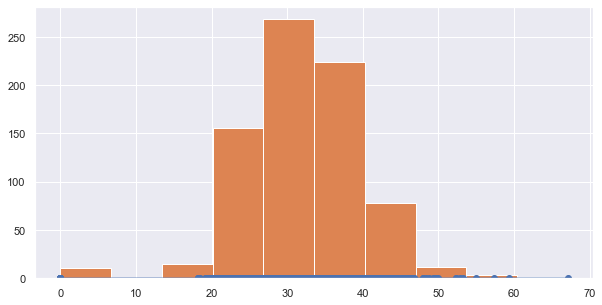

In [88]:
# draw random sample from a normal (gaussian) distribution
mu = healthcare.BMI.mean() # mean
sigma = healthcare.BMI.std() # std
h = healthcare.sort_values(by='BMI').BMI.values
h, abs(mu - np.mean(h)) < 1 # verification

plt.figure(figsize=(10, 5))

fit = stats.norm.pdf(h, np.mean(h), np.std(h)) # fitting

plt.plot(h,fit, '-o')
#plt.hist(abs(mu - np.mean(h)) / len(h))
#plt.hist((mu - np.mean(h)))
plt.hist(abs(h))

/Users/niru/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


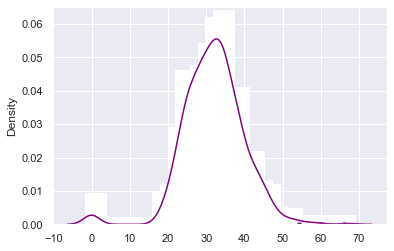

In [89]:
ax = sns.distplot(h, 
                 kde=True,
                 color='purple',
                  hist_kws={"linewidth": 15, 'alpha': 1})

#  Treat the missing values accordingly.

In [90]:
X_diabetes, y_diabetes = np.array(healthcare.iloc[:, 0:8]), np.array(healthcare.iloc[:, -1])
X_diabetes, y_diabetes

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [91]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

In [92]:
# impute with mean, median, mode

imputer_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")
imputer_median = SimpleImputer(missing_values = np.nan, strategy = "median")
imputer_mode = SimpleImputer(strategy = "most_frequent")

imputer_mean.fit(X_diabetes), imputer_median.fit(X_diabetes)

(SimpleImputer(), SimpleImputer(strategy='median'))

In [93]:
mean_imputdf, median_imputdf = imputer_mean.transform(X_diabetes), imputer_median.transform(X_diabetes)
mean_imputdf, median_imputdf

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]))

In [94]:
#col_df = pd.DataFrame(X_diabetes)[[1,2,3,4,5]].astype(object)
#col_df.info()
#col_df_object = pd.Dataframe(np.array(col_df), dtype = 'category')
#imputer_mode.fit_transform(col_df_object)

In [95]:
X_diabetes_meanimputed = pd.DataFrame(mean_imputdf).join(pd.DataFrame(y_diabetes, columns = [8]))
X_diabetes_medianimputed = pd.DataFrame(median_imputdf).join(pd.DataFrame(y_diabetes, columns = [8]))
X_diabetes_meanimputed, X_diabetes_medianimputed

(        0      1      2     3      4     5      6     7  8
 0     6.0  148.0   72.0  35.0    0.0  33.6  0.627  50.0  1
 1     1.0   85.0   66.0  29.0    0.0  26.6  0.351  31.0  0
 2     8.0  183.0   64.0   0.0    0.0  23.3  0.672  32.0  1
 3     1.0   89.0   66.0  23.0   94.0  28.1  0.167  21.0  0
 4     0.0  137.0   40.0  35.0  168.0  43.1  2.288  33.0  1
 5     5.0  116.0   74.0   0.0    0.0  25.6  0.201  30.0  0
 6     3.0   78.0   50.0  32.0   88.0  31.0  0.248  26.0  1
 7    10.0  115.0    0.0   0.0    0.0  35.3  0.134  29.0  0
 8     2.0  197.0   70.0  45.0  543.0  30.5  0.158  53.0  1
 9     8.0  125.0   96.0   0.0    0.0   0.0  0.232  54.0  1
 10    4.0  110.0   92.0   0.0    0.0  37.6  0.191  30.0  0
 11   10.0  168.0   74.0   0.0    0.0  38.0  0.537  34.0  1
 12   10.0  139.0   80.0   0.0    0.0  27.1  1.441  57.0  0
 13    1.0  189.0   60.0  23.0  846.0  30.1  0.398  59.0  1
 14    5.0  166.0   72.0  19.0  175.0  25.8  0.587  51.0  1
 15    7.0  100.0    0.0   0.0    0.0  3

In [96]:
X_diabetes_meanimputed.columns = pd.DataFrame(healthcare).columns
X_diabetes_medianimputed.columns = pd.DataFrame(healthcare).columns

In [97]:
X_diabetes_meanimputed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1


In [98]:
X_diabetes_medianimputed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1


In [99]:
X_diabetes_meanimputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [100]:
X_diabetes_medianimputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

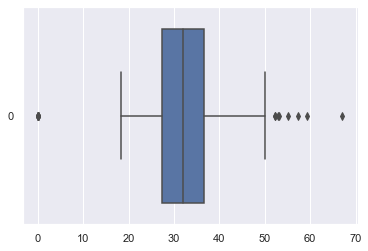

In [101]:
sns.boxplot(data=X_diabetes_meanimputed['BMI'],orient="h")

<AxesSubplot:>

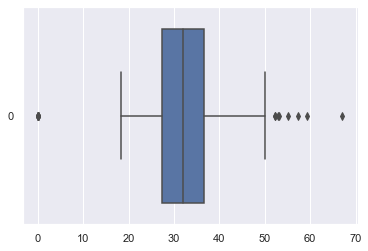

In [102]:
sns.boxplot(data=X_diabetes_medianimputed['BMI'],orient="h")

# There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

#    Project Task: Week 2

#    Data Exploration:

#    1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

#    2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

#    3. Perform correlation analysis. Visually explore it using a heat map.

Automatically created module for IPython interactive environment


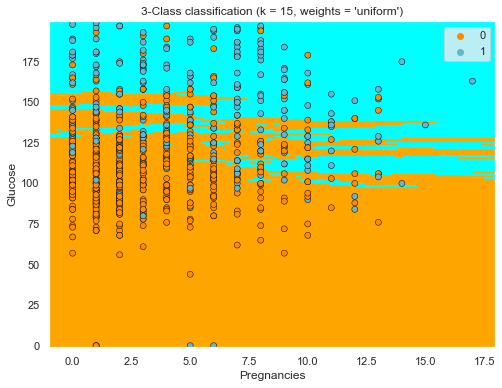

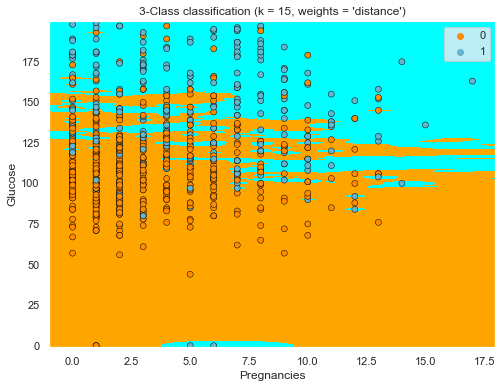

In [109]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors

n_neighbors = 15

X = X_diabetes[:, :2]
y = y_diabetes

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ['darkorange', 'c']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_diabetes,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel('Pregnancies')
    plt.ylabel('Glucose')

plt.show()

Automatically created module for IPython interactive environment


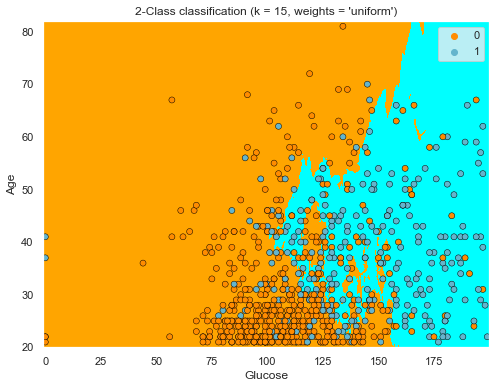

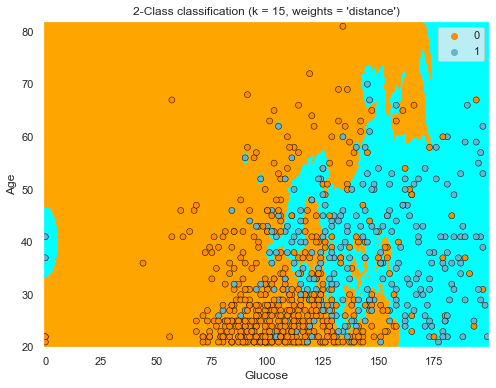

In [110]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors

n_neighbors = 15

X = X_diabetes[:, [1,7]]
y = y_diabetes

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ['darkorange', 'c']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_diabetes,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel('Glucose')
    plt.ylabel('Age')

plt.show()

# Project Task: Week 3

# Data Modeling:

# 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

# 2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

# Project Task: Week 4

# Data Modeling:

# 1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

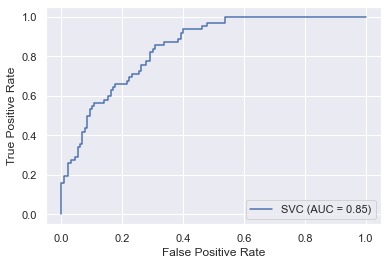

In [125]:
import matplotlib.pyplot as plt
from sklearn import metrics, model_selection, svm

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_diabetes, y_diabetes, random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)

svc_disp = metrics.plot_roc_curve(clf, X_test, y_test) 

plt.show()

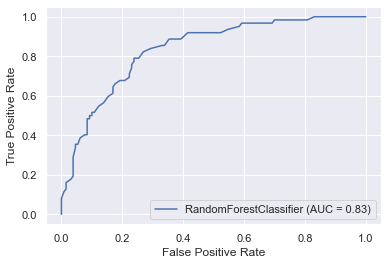

In [126]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

metrics.plot_roc_curve(rfc, X_test, y_test) 

plt.show()

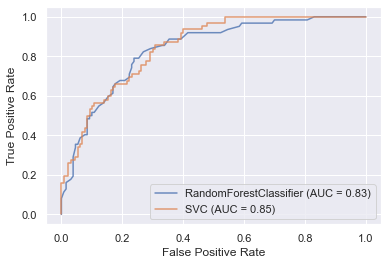

In [127]:
ax = plt.gca()
rfc_disp = metrics.plot_roc_curve(rfc, X_test, y_test,ax = ax, alpha=0.8)

svc_disp.plot(ax=ax, alpha=0.8)